<div align="center" style=" font-size: 80%; text-align: center; margin: 0 auto">
<img src="https://raw.githubusercontent.com/Explore-AI/Pictures/master/Python-Notebook-Banners/Exercise.png"  style="display: block; margin-left: auto; margin-right: auto;";/>
</div>

# Exercise: Hypothesis testing
© ExploreAI Academy

In this exercise, we will use hypothesis testing to make an inference about a population parameter based on sample data.

## Learning objectives

By the end of this train, you should be able to:
* Calculate a test statistic.
* Determine critical values based on a chosen significance level.
* Make a decision on whether to reject the null hypothesis.

## Exercises

Given a population where the average weight of a species of butterfly is believed to be 150 mg with a standard deviation of 20 mg, you collect a sample of 30 butterflies and find their average weight to be 145 mg. Use a 5% significance level to test the hypothesis that the population mean weight is 150 mg against the alternative hypothesis that it is not 150 mg (determining whether the observed average weight of the sample of butterflies significantly deviates from the presumed population average weight).

In the exercises below, we will develop different functions, each responsible for a specific part of the hypothesis-testing process.

### Import libraries and dataset

In [1]:
from scipy.stats import norm

### Exercise 1

State the null and alternative hypotheses.

# Your solution here...

Null hypothesis H0 : the population mean weight is 150 mg, i.e., μ = 150 <br>
Alternative hypothesis Ha : the poppulation mean is not 150 mg, i.e., μ != 150

### Exercise 2

Write a function that calculates the test statistic (z-value) based on the sample mean, population mean, population standard deviation, and sample size.

The test statistic can be calculated using the formula for a one-sample z-test:

> z = (x̄ - μ) / (σ / √n)

where:

- `x̄` is the sample mean.
- `μ` is the population mean under the null hypothesis.
- `σ` is the population standard deviation.
- `n` is the sample size.

In [21]:
# Your solution here...
from math import sqrt
def calculate_z_value(sample_mean, population_mean, standard_deviation, sample_size):
    #calculating thje z-value
    z_value = (sample_mean - population_mean) / (standard_deviation / sqrt(sample_size))

    return z_value

### Exercise 3

Write a function that returns the lower and upper critical z-values for a two-sided test at a specific significance level.

In [28]:
# Your solution here...
def critical_z_values(significance_level):
    # lower value
    lower_z = norm.ppf(significance_level)
    # upper value
    upper_z = norm.ppf(1 - significance_level)

    return lower_z, upper_z

### Exercise 4

Write a function which makes a decision on whether to reject or not reject the null hypothesis based on the test statistic and critical values.

In [29]:
# Your solution here...
def decide_null_hypothesis(z_value, lower_z, upper_z):
    if z_value < lower_z or z_value > upper_z :
        return "Reject the null hypothesis"
    else :
        return "Fail to reject the null hypothesis"

### Exercise 5

Run the following code that puts together all the functions we have created in the previous exercises to perform the hypothesis test for the given butterfly population data.

> What does our decision mean in the context of the butterfly population?

In [30]:
# Given data
sample_mean = 145  # sample mean weight in mg
population_mean = 150  # hypothesised population mean weight in mg
population_std = 20  # population standard deviation in mg
n = 30  # sample size
alpha = 0.05  # significance level

# Calculate the z-value
z = calculate_z_value(sample_mean, population_mean, population_std, n)

# Get critical z-values
lower_z, upper_z = critical_z_values(alpha)

# Make a decision
decision = decide_null_hypothesis(z, lower_z, upper_z)

print(f"Test Statistic (z-value): {z}")
print(f"Critical z-value (lower): {lower_z}, Upper: {upper_z}")
print(f"Decision: {decision}")

Test Statistic (z-value): -1.3693063937629153
Critical z-value (lower): -1.6448536269514729, Upper: 1.6448536269514722
Decision: Fail to reject the null hypothesis


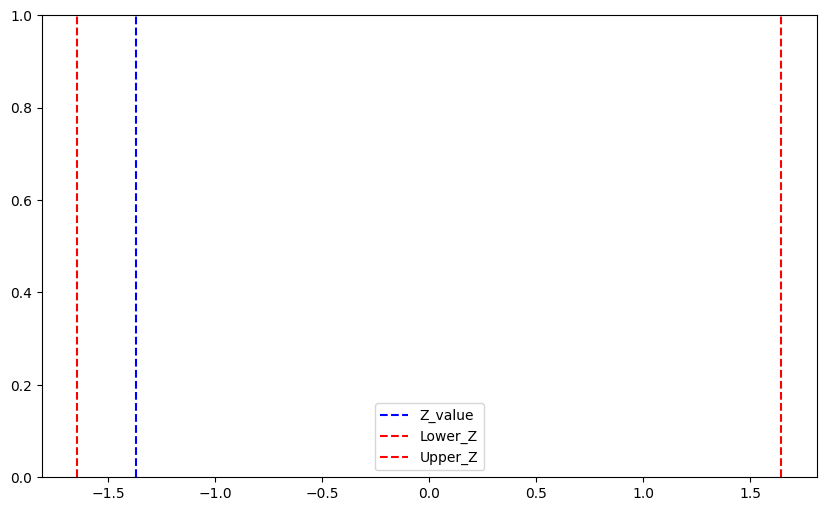

In [33]:
# plot
import matplotlib.pyplot as plt 
plt.rcParams["figure.figsize"] = (10,6)
#plt.plot(x,f,'k')
plt.axvline(x = z, color = 'b', linestyle = '--', label = 'Z_value')
plt.axvline(x = lower_z, color = 'r', linestyle = '--', label = 'Lower_Z')
plt.axvline(x = upper_z, color = 'r', linestyle = '--', label = 'Upper_Z')
plt.legend()
plt.show()

## Solutions

### Exercise 1

- **Null hypothesis (H0):** The population mean weight of the species of butterfly is 150 mg, i.e. μ = 150 mg.

- **Alternative hypothesis (HA):** The population mean weight of the species of butterfly is not 150 mg, i.e. μ ≠ 150 mg.

### Exercise 2

In [ ]:
def calculate_z_value(sample_mean, population_mean, population_std, sample_size):
    
    # Calculate the z-value using the formula for a one-sample z-test
    z_value = (sample_mean - population_mean) / (population_std / (sample_size ** 0.5))
    
    return z_value

The `calculate_z_value` function takes four parameters: `sample_mean`, `population_mean`, `population_std`, and `sample_size`. It uses these to calculate the **z_value** as per the formula provided above.

The z-value, or z-score, is a test statistic that helps us evaluate the strength of the evidence against the null hypothesis. It determines how many standard deviations the sample mean is away from the population mean under the null hypothesis. 

### Exercise 3

In [ ]:
def critical_z_values(significance_level):
    
    # Calculate the lower critical z-value.
    lower_z = norm.ppf(significance_level / 2)
    
      # Calculate the upper critical z-value.
    upper_z = norm.ppf(1 - significance_level / 2)
    
    return lower_z, upper_z

The `critical_z_values` function takes the `significance_level` as a parameter which, using `norm.ppf` (percent point function), helps calculate:

- `lower_z`: This is the lower critical z-value that cuts off the lower tail of the normal distribution, leaving an area of significance_level / 2 to the left.
- `upper_z`: This is the upper critical z-value that cuts off the upper tail of the normal distribution, leaving an area of significance_level / 2 to the right.

These critical values are used to determine the rejection region for a two-sided hypothesis test. 

### Exercise 4

In [ ]:
def decide_null_hypothesis(z_value, lower_z, upper_z):
    if z_value < lower_z or z_value > upper_z:
        decision = "Reject null hypothesis"
    else:
        decision = "Do not reject null hypothesis"
    return decision

The `decide_null_hypothesis` function takes the parameters: `z_value`, `lower_z`, and `upper_z` calculated in the previous functions. 

We use them to make a decision regarding the null hypothesis in a two-sided hypothesis test:
- If the test statistic (z-value) is less than the lower critical value or greater than the upper critical value, the decision is to "Reject null hypothesis".
- Otherwise, if the z_value falls within the range defined by the lower and upper critical values, the decision is to "Do not reject null hypothesis".

### Exercise 5

In [ ]:
# Given data
sample_mean = 145  # sample mean weight in mg
population_mean = 150  # hypothesised population mean weight in mg
population_std = 20  # population standard deviation in mg
n = 30  # sample size
alpha = 0.05  # significance level

# Calculate the z-value
z = calculate_z_value(sample_mean, population_mean, population_std, n)

# Get critical z-values
lower_z, upper_z = critical_z_values(alpha)

# Make a decision
decision = decide_null_hypothesis(z, lower_z, upper_z)

print(f"Test Statistic (z-value): {z}")
print(f"Critical z-value (lower): {lower_z}, Upper: {upper_z}")
print(f"Decision: {decision}")

Since the **z-value** of `-1.37` is within the **critical values** of `-1.96` and `+1.96`, we **do not reject the null hypothesis**.

The decision to not reject the null hypothesis indicates that there isn't sufficient evidence at the 5% significance level to conclude that the population mean weight of the species of butterfly is different from 150 mg. This suggests that the observed sample mean weight of 145 mg can be attributed to sampling variability and does not provide strong evidence against the population mean being 150 mg, given the sample size and standard deviation specified.

<div align="center" style=" font-size: 80%; text-align: center; margin: 0 auto">
<img src="https://raw.githubusercontent.com/Explore-AI/Pictures/master/ExploreAI_logos/EAI_Blue_Dark.png"  style="width:200px";/>
</div>